In [2]:
import pandas as pd
import numpy as np

df1= pd.read_csv('EW_csv.csv',encoding='CP949')
df1

,기준일자,시도,시군구,법정동,기업공개,업종대분류코드,업종중분류코드,업종대분류,업종중분류,기업규모,대표자성별,업력구간,대표자연령구간,EW등급,기업수
0,20180101,강원,강릉시,교동,외감,D,D35,"전기, 가스, 증기 및 공기조절 공급업","전기, 가스, 증기 및 공기조절 공급업",중견기업,남,2년이상 5년미만,50대,정상,1
1,20180101,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,소기업,여,1년이상 2년미만,40대,정상,1
2,20180101,강원,강릉시,교동,외감,F,F41,건설업,종합 건설업,중기업,남,20년이상 30년미만,50대,정상,1
3,20180101,강원,강릉시,교동,외감,I,I55,숙박 및 음식점업,숙박업,소기업,남,2년이상 5년미만,40대,정상,1
4,20180101,강원,강릉시,교동,외감,L,L68,부동산업,부동산업,소기업,남,1년이상 2년미만,50대,정상,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36648809,20201201,충북,청주시흥덕구,휴암동,일반법인,M,M73,"전문, 과학 및 기술 서비스업","기타 전문, 과학 및 기술 서비스업",중기업,남,1년이상 2년미만,50대,정상,1
36648810,20201201,충북,청주시흥덕구,휴암동,일반법인,N,N75,"사업시설 관리, 사업 지원 및 임대 서비스업",사업지원 서비스업,소기업,남,2년이상 5년미만,40대,정상,1
36648811,20201201,충북,청주시흥덕구,휴암동,일반법인,R,R91,"예술, 스포츠 및 여가관련 서비스업",스포츠 및 오락관련 서비스업,미분류,남,2년이상 5년미만,60대,정상,1
36648812,20201201,충북,청주시흥덕구,휴암동,일반법인,R,R91,"예술, 스포츠 및 여가관련 서비스업",스포츠 및 오락관련 서비스업,소기업,남,5년이상 10년미만,60대,정상,1


In [ ]:
# temp1 = (df1.대표자연령구간 == '20대') | (df1.대표자연령구간 == '30대')
# df1=df1[temp1]
# df1['기준일자']=df1['기준일자'].astype('str')
# df1['기준일자']=pd.to_datetime(df1['기준일자'])
# target_year = 2018
# target_year2 = 2019
# target_year3 = 2020
# df_2018=df1.query('기준일자.dt.year == @target_year')
# df_2019=df1.query('기준일자.dt.year == @target_year2')
# df_2020=df1.query('기준일자.dt.year == @target_year3')
# df_2018['기준일자']=2018
# df_2019['기준일자']=2019
# df_2020['기준일자']=2020
# df1=pd.concat([df_2018,df_2019,df_2020])
# test1 = df1.groupby(['시도','기준일자','EW등급'])['EW등급'].count()
# test1=pd.DataFrame(test1)
# test1=test1.unstack()
# test1 = test1.fillna(0)
# # test1=test1.reset_index()

# test1
# test1['total']=test1.sum(axis=1)
# total = test1['total']
# normal = test1['EW등급']['정상']
# rate = (normal/total)*100
# test1['normal_rate']=rate
# budo=((test1['EW등급']['관심']*0.15)+(test1['EW등급']['관찰1']*0.20)+(test1['EW등급']['관찰2']*0.30)+(test1['EW등급']['관찰3']*0.90)+(test1['EW등급']['부도']*1))
# budo_sum=test1['EW등급']['관심']+test1['EW등급']['관찰1']+test1['EW등급']['관찰2']+test1['EW등급']['관찰3']+test1['EW등급']['부도']+test1['EW등급']['정상']+test1['EW등급']['폐업']
# budo_rate = (budo/budo_sum)*100
# test1['budo_rate']=budo_rate
# test1

In [3]:
temp1 = (df1.대표자연령구간 == '20대') | (df1.대표자연령구간 == '30대')
df1=df1[temp1]
df1['기준일자']=df1['기준일자'].astype('str')
df1['기준일자']=pd.to_datetime(df1['기준일자'])
target_year = 2018
target_year2 = 2019
target_year3 = 2020
df_2018=df1.query('기준일자.dt.year == @target_year')
df_2019=df1.query('기준일자.dt.year == @target_year2')
df_2020=df1.query('기준일자.dt.year == @target_year3')
df_2018['기준일자']=2018
df_2019['기준일자']=2019
df_2020['기준일자']=2020
df1=pd.concat([df_2018,df_2019,df_2020])
test1 = df1.groupby(['시도','기준일자','EW등급'])['EW등급'].count()
test1=pd.DataFrame(test1)
test1=test1.unstack()
test1 = test1.fillna(0)
test1=test1.reset_index()
test1=test1.set_index(test1['기준일자'])
# test1
test1['total']=test1.sum(axis=1)
total = test1['total']
normal = test1['EW등급']['정상']
rate = (normal/total)*100
test1['normal_rate']=rate
budo=((test1['EW등급']['관심']*0.15)+(test1['EW등급']['관찰1']*0.20)+(test1['EW등급']['관찰2']*0.30)+(test1['EW등급']['관찰3']*0.90)+(test1['EW등급']['부도']*1))
budo_sum=test1['EW등급']['관심']+test1['EW등급']['관찰1']+test1['EW등급']['관찰2']+test1['EW등급']['관찰3']+test1['EW등급']['부도']+test1['EW등급']['정상']+test1['EW등급']['폐업']
budo_rate = (budo/budo_sum)*100
test1['budo_rate']=budo_rate
test1

<ipython-input-3-202358b7b24f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['기준일자']=df1['기준일자'].astype('str')
<ipython-input-3-202358b7b24f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['기준일자']=pd.to_datetime(df1['기준일자'])
<ipython-input-3-202358b7b24f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

시도  기준일자    EW등급                                                      \
EW등급                관심      관찰1      관찰2     관찰3     부도        정상       폐업   
기준일자                                                                         
2018  강원  2018   863.0   1036.0   1969.0   608.0   24.0   24655.0   2544.0   
2019  강원  2019   703.0   1038.0   2160.0   610.0   26.0   26498.0   2647.0   
2020  강원  2020   638.0   1107.0   2147.0   464.0    0.0   28102.0   2855.0   
2018  경기  2018  7468.0  11266.0  30707.0  7313.0  107.0  257014.0  38466.0   
2019  경기  2019  6533.0  11481.0  34509.0  8098.0   78.0  271478.0  39213.0   
2020  경기  2020  6162.0  11211.0  35219.0  7322.0   58.0  291381.0  47246.0   
2018  경남  2018  1589.0   1378.0   3896.0  1284.0   44.0   47802.0   6611.0   
2019  경남  2019  1292.0   1511.0   4324.0  1553.0   22.0   48460.0   6471.0   
2020  경남  2020  1332.0   1366.0   4187.0  1415.0    8.0   49891.0   7506.0   
2018  경북  2018  1419.0   2013.0   4605.0  1242.0    6.0   45433.0   4979.0   
2019  경북  2019  1201.0   2034.0   5155.0  1358.0    0.0   46877.0   5218.0   
2020  경북  2020   989.0   1962.0   5168.0  1187.0    8.0   48700.0   6116.0   
2018  광주  2018  1062.0   1584.0   4098.0   907.0    0.0   38062.0   4556.0   
2019  광주  2019   831.0   1666.0   4728.0  1056.0    0.0   40594.0   4648.0   
2020  광주  2020   732.0   1911.0   4568.0   881.0    0.0   42743.0   5655.0   
2018  대구  2018   845.0   1907.0   4118.0   839.0   29.0   38214.0   5806.0   
2019  대구  2019   865.0   1795.0   4578.0  1089.0    9.0   39666.0   5598.0   
2020  대구  2020   874.0   1774.0   4649.0   979.0    0.0   41545.0   6518.0   
2018  대전  2018   935.0   1493.0   3959.0   677.0    0.0   28431.0   4345.0   
2019  대전  2019   695.0   1468.0   4077.0   919.0    0.0   30120.0   4485.0   
2020  대전  2020   714.0   1494.0   3559.0   822.0    0.0   32462.0   5149.0   
2018  부산  2018  1663.0   2088.0   5105.0  1730.0   27.0   57552.0   7899.0   
2019  부산  2019  1581.0   2273.0   5549.0  1987.0   30.0   60025.0   8155.0   
2020  부산  2020  1394.0   2127.0   5564.0  1635.0   36.0   62296.0   9784.0   
2018  서울  2018  9345.0  13371.0  27327.0  8192.0  155.0  280139.0  47703.0   
2019  서울  2019  8251.0  14026.0  28620.0  9067.0   85.0  291487.0  48017.0   
2020  서울  2020  7514.0  13636.0  27164.0  7873.0   68.0  301304.0  56994.0   
2018  세종  2018   242.0    251.0    464.0    92.0    0.0    5642.0    387.0   
2019  세종  2019   181.0    303.0    495.0   150.0    0.0    6155.0    429.0   
2020  세종  2020   180.0    200.0    514.0   132.0    0.0    7024.0    560.0   
2018  울산  2018   567.0    486.0   1449.0   525.0    8.0   14400.0   1912.0   
2019  울산  2019   468.0    395.0   1656.0   573.0    0.0   15296.0   2035.0   
2020  울산  2020   328.0    591.0   1583.0   487.0    4.0   15641.0   2476.0   
2018  인천  2018  1198.0   2272.0   5777.0  1540.0   94.0   46543.0   8315.0   
2019  인천  2019  1224.0   2336.0   6497.0  1801.0   74.0   49033.0   8171.0   
2020  인천  2020  1099.0   2357.0   6443.0  1553.0   58.0   52179.0  10091.0   
2018  전남  2018  1674.0    972.0   3080.0   974.0    0.0   42407.0   4224.0   
2019  전남  2019  1421.0   1101.0   3174.0  1121.0    0.0   44052.0   4256.0   
2020  전남  2020  1248.0   1074.0   3206.0  1012.0    0.0   45440.0   4800.0   
2018  전북  2018  1494.0   1618.0   4459.0  1217.0    5.0   40483.0   4728.0   
2019  전북  2019  1368.0   1709.0   4504.0  1276.0    3.0   41704.0   4868.0   
2020  전북  2020  1001.0   1657.0   4632.0  1150.0    0.0   44295.0   5774.0   
2018  제주  2018   626.0    464.0    907.0   341.0    0.0   17119.0   1666.0   
2019  제주  2019   703.0    475.0   1034.0   405.0    0.0   17828.0   1807.0   
2020  제주  2020   537.0    533.0   1093.0   449.0    0.0   17801.0   2294.0   
2018  충남  2018  1354.0   2017.0   4761.0   871.0    0.0   43172.0   5390.0   
2019  충남  2019  1067.0   1887.0   5059.0  1196.0    0.0   44437.0   5553.0   
2020  충남  2020  1043.0   1913.0   4946.0  1051.0    5.0   47971.0   6503.0   
2018  충북  2018  1063.0   119

In [ ]:
test1[test1['시도']=='강원']

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('figure', figsize=(10,10))

<AxesSubplot:xlabel='기준일자'>

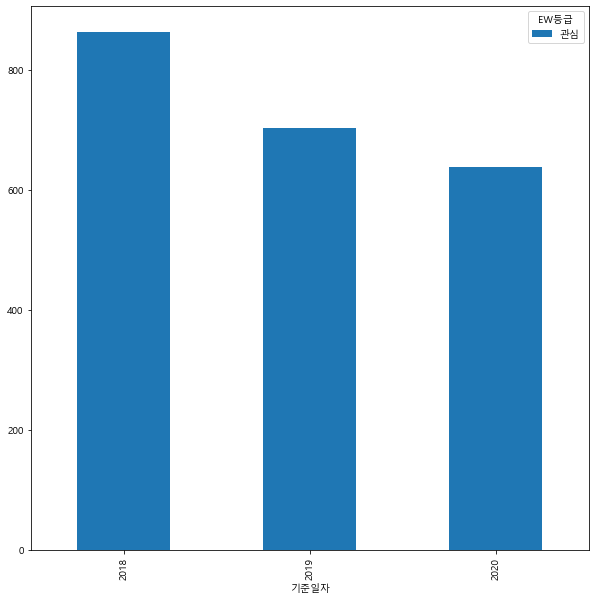

In [93]:
test1[test1['시도']=='강원']['EW등급'][['관심']].plot(kind='bar')


In [7]:
plt.plot?

In [118]:
len(test1)

51

In [5]:
sido=np.unique(test1['시도'])
sido

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [6]:
EW=test1['EW등급'].keys()
EW

Index(['관심', '관찰1', '관찰2', '관찰3', '부도', '정상', '폐업', '휴업'], dtype='object', name='EW등급')

In [129]:
plt.subplots?

In [155]:
index=list(set(test1.index))
index

[2018, 2019, 2020]

In [7]:
import seaborn as sns
test1

시도  기준일자    EW등급                                                      \
EW등급                관심      관찰1      관찰2     관찰3     부도        정상       폐업   
기준일자                                                                         
2018  강원  2018   863.0   1036.0   1969.0   608.0   24.0   24655.0   2544.0   
2019  강원  2019   703.0   1038.0   2160.0   610.0   26.0   26498.0   2647.0   
2020  강원  2020   638.0   1107.0   2147.0   464.0    0.0   28102.0   2855.0   
2018  경기  2018  7468.0  11266.0  30707.0  7313.0  107.0  257014.0  38466.0   
2019  경기  2019  6533.0  11481.0  34509.0  8098.0   78.0  271478.0  39213.0   
2020  경기  2020  6162.0  11211.0  35219.0  7322.0   58.0  291381.0  47246.0   
2018  경남  2018  1589.0   1378.0   3896.0  1284.0   44.0   47802.0   6611.0   
2019  경남  2019  1292.0   1511.0   4324.0  1553.0   22.0   48460.0   6471.0   
2020  경남  2020  1332.0   1366.0   4187.0  1415.0    8.0   49891.0   7506.0   
2018  경북  2018  1419.0   2013.0   4605.0  1242.0    6.0   45433.0   4979.0   
2019  경북  2019  1201.0   2034.0   5155.0  1358.0    0.0   46877.0   5218.0   
2020  경북  2020   989.0   1962.0   5168.0  1187.0    8.0   48700.0   6116.0   
2018  광주  2018  1062.0   1584.0   4098.0   907.0    0.0   38062.0   4556.0   
2019  광주  2019   831.0   1666.0   4728.0  1056.0    0.0   40594.0   4648.0   
2020  광주  2020   732.0   1911.0   4568.0   881.0    0.0   42743.0   5655.0   
2018  대구  2018   845.0   1907.0   4118.0   839.0   29.0   38214.0   5806.0   
2019  대구  2019   865.0   1795.0   4578.0  1089.0    9.0   39666.0   5598.0   
2020  대구  2020   874.0   1774.0   4649.0   979.0    0.0   41545.0   6518.0   
2018  대전  2018   935.0   1493.0   3959.0   677.0    0.0   28431.0   4345.0   
2019  대전  2019   695.0   1468.0   4077.0   919.0    0.0   30120.0   4485.0   
2020  대전  2020   714.0   1494.0   3559.0   822.0    0.0   32462.0   5149.0   
2018  부산  2018  1663.0   2088.0   5105.0  1730.0   27.0   57552.0   7899.0   
2019  부산  2019  1581.0   2273.0   5549.0  1987.0   30.0   60025.0   8155.0   
2020  부산  2020  1394.0   2127.0   5564.0  1635.0   36.0   62296.0   9784.0   
2018  서울  2018  9345.0  13371.0  27327.0  8192.0  155.0  280139.0  47703.0   
2019  서울  2019  8251.0  14026.0  28620.0  9067.0   85.0  291487.0  48017.0   
2020  서울  2020  7514.0  13636.0  27164.0  7873.0   68.0  301304.0  56994.0   
2018  세종  2018   242.0    251.0    464.0    92.0    0.0    5642.0    387.0   
2019  세종  2019   181.0    303.0    495.0   150.0    0.0    6155.0    429.0   
2020  세종  2020   180.0    200.0    514.0   132.0    0.0    7024.0    560.0   
2018  울산  2018   567.0    486.0   1449.0   525.0    8.0   14400.0   1912.0   
2019  울산  2019   468.0    395.0   1656.0   573.0    0.0   15296.0   2035.0   
2020  울산  2020   328.0    591.0   1583.0   487.0    4.0   15641.0   2476.0   
2018  인천  2018  1198.0   2272.0   5777.0  1540.0   94.0   46543.0   8315.0   
2019  인천  2019  1224.0   2336.0   6497.0  1801.0   74.0   49033.0   8171.0   
2020  인천  2020  1099.0   2357.0   6443.0  1553.0   58.0   52179.0  10091.0   
2018  전남  2018  1674.0    972.0   3080.0   974.0    0.0   42407.0   4224.0   
2019  전남  2019  1421.0   1101.0   3174.0  1121.0    0.0   44052.0   4256.0   
2020  전남  2020  1248.0   1074.0   3206.0  1012.0    0.0   45440.0   4800.0   
2018  전북  2018  1494.0   1618.0   4459.0  1217.0    5.0   40483.0   4728.0   
2019  전북  2019  1368.0   1709.0   4504.0  1276.0    3.0   41704.0   4868.0   
2020  전북  2020  1001.0   1657.0   4632.0  1150.0    0.0   44295.0   5774.0   
2018  제주  2018   626.0    464.0    907.0   341.0    0.0   17119.0   1666.0   
2019  제주  2019   703.0    475.0   1034.0   405.0    0.0   17828.0   1807.0   
2020  제주  2020   537.0    533.0   1093.0   449.0    0.0   17801.0   2294.0   
2018  충남  2018  1354.0   2017.0   4761.0   871.0    0.0   43172.0   5390.0   
2019  충남  2019  1067.0   1887.0   5059.0  1196.0    0.0   44437.0   5553.0   
2020  충남  2020  1043.0   1913.0   4946.0  1051.0    5.0   47971.0   6503.0   
2018  충북  2018  1063.0   119

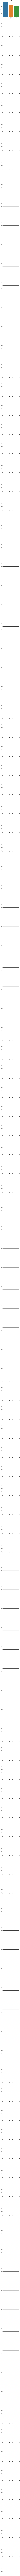

In [12]:
s=int(len(test1)/3)*len(EW)
fig,ax=plt.subplots(s,1,figsize=(5,800))
for i,j in enumerate(sido):
#     sns.barplot(x = '시도',y=)
#     index=test1[test1['시도']==j]['EW등급'][b].index
    for a,b in enumerate(EW):
        index=test1[test1['시도']==j]['EW등급'][b].index
        data=test1[test1['시도']==j]['EW등급'][b]
        sns.barplot(x = index,y=data,ax=ax[a])
        ax[a].set_title(b)
    plt.show()
#         data=test1[test1['시도']==j]['EW등급'][b]
#         a=a+(i*len(EW))
#         plt.xticks(rotation=-90)
#         plt.barplot(x=,y=)
#         data.plot(kind='bar',ax=ax[a],legend=True,xlabel=j,ylabel='기업수',title=b)

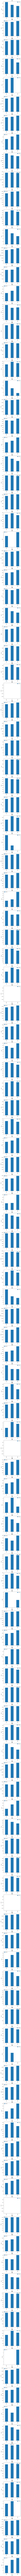

In [158]:
s=int(len(test1)/3)*len(EW)
fig,ax=plt.subplots(s,1,figsize=(5,800))
for i,j in enumerate(sido):
    for a,b in enumerate(EW):
        data=test1[test1['시도']==j]['EW등급'][b]
        a=a+(i*len(EW))
        plt.xticks(rotation=-90)
        plt.barplot(x=,y=)
        data.plot(kind='bar',ax=ax[a],legend=True,xlabel=j,ylabel='기업수',title=b)
#     print(data)
#     globals()['sido_{}'.format(i)]=j
#     globals()['sido_{}'.format(i)]=test1[test1['시도']==globals()['sido_{}'.format(i)]]['EW등급']['관심']
#     test1.plot(kind='bar',ax=ax[i])
#     print(globals()['sido_{}'.format(i)])
#     globals()['sido_{}'.format(i)].plot(kind='bar',legend=True)

In [141]:
plt.rcParams["figure.figsize"] = (5, 700)

C:\ProgramData\Anaconda3\envs\da\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\da\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


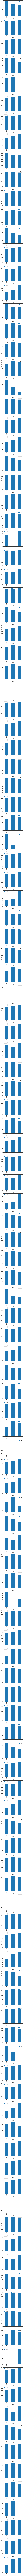

In [142]:
s=int(len(test1)/3)*len(EW)
# fig,ax=plt.subplots(s,1,figsize=(5,800))
for i,j in enumerate(sido):
    for a,b in enumerate(EW):
        data=test1[test1['시도']==j]['EW등급'][b]
        a=a+(i*len(EW))
        plt.subplot(s,1,a+1)
        data.plot(kind='bar',legend=True)
#     print(data)
#     globals()['sido_{}'.format(i)]=j
#     globals()['sido_{}'.format(i)]=test1[test1['시도']A==globals()['sido_{}'.format(i)]]['EW등급']['관심']
#     test1.plot(kind='bar',ax=ax[i])
#     print(globals()['sido_{}'.format(i)])
#     globals()['sido_{}'.format(i)].plot(kind='bar',legend=True)